In [ ]:
# Ch10-4 - Reconstructing Phylogenetic Trees [Updated to use raxml-ng]

In [ ]:
# Install raxml-ng
! brew install raxml-ng

In [ ]:
# 18.  Use DendroPy to reconstruct genus dataset (takes 15-30 minutes)
import os
import subprocess

# Define input and output paths
data_path = "trim.fasta"
output_prefix = "ebola_tree"

# Check if the input file exists
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Error: The file {data_path} does not exist!")

# Define the RAxML-NG command
cmd = [
    "raxml-ng",
    "--msa", data_path,    # Input sequence alignment
    "--model", "GTR+G",    # Substitution model
    "--prefix", output_prefix,  # Output file prefix
    "--search"  # Perform Maximum Likelihood tree search
]

# Run RAxML-NG
try:
    subprocess.run(cmd, check=True)
    print(f"RAxML-NG completed successfully. Output files are saved with prefix '{output_prefix}'")
except subprocess.CalledProcessError as e:
    print(f"Error running RAxML-NG: {e}")

# Optional: Clean up RAxML-NG temporary files
for ext in [".raxml.log", ".raxml.bestTree", ".raxml.rba", ".raxml.rfdist"]:
    file_path = f"{output_prefix}{ext}"
    if os.path.exists(file_path):
        os.remove(file_path)

print("Temporary files cleaned up.")


In [ ]:
# You will see ebola_tree.raxml* files in the working directory 

In [ ]:
# 19.  Save the files - skip this because we already have the fiels

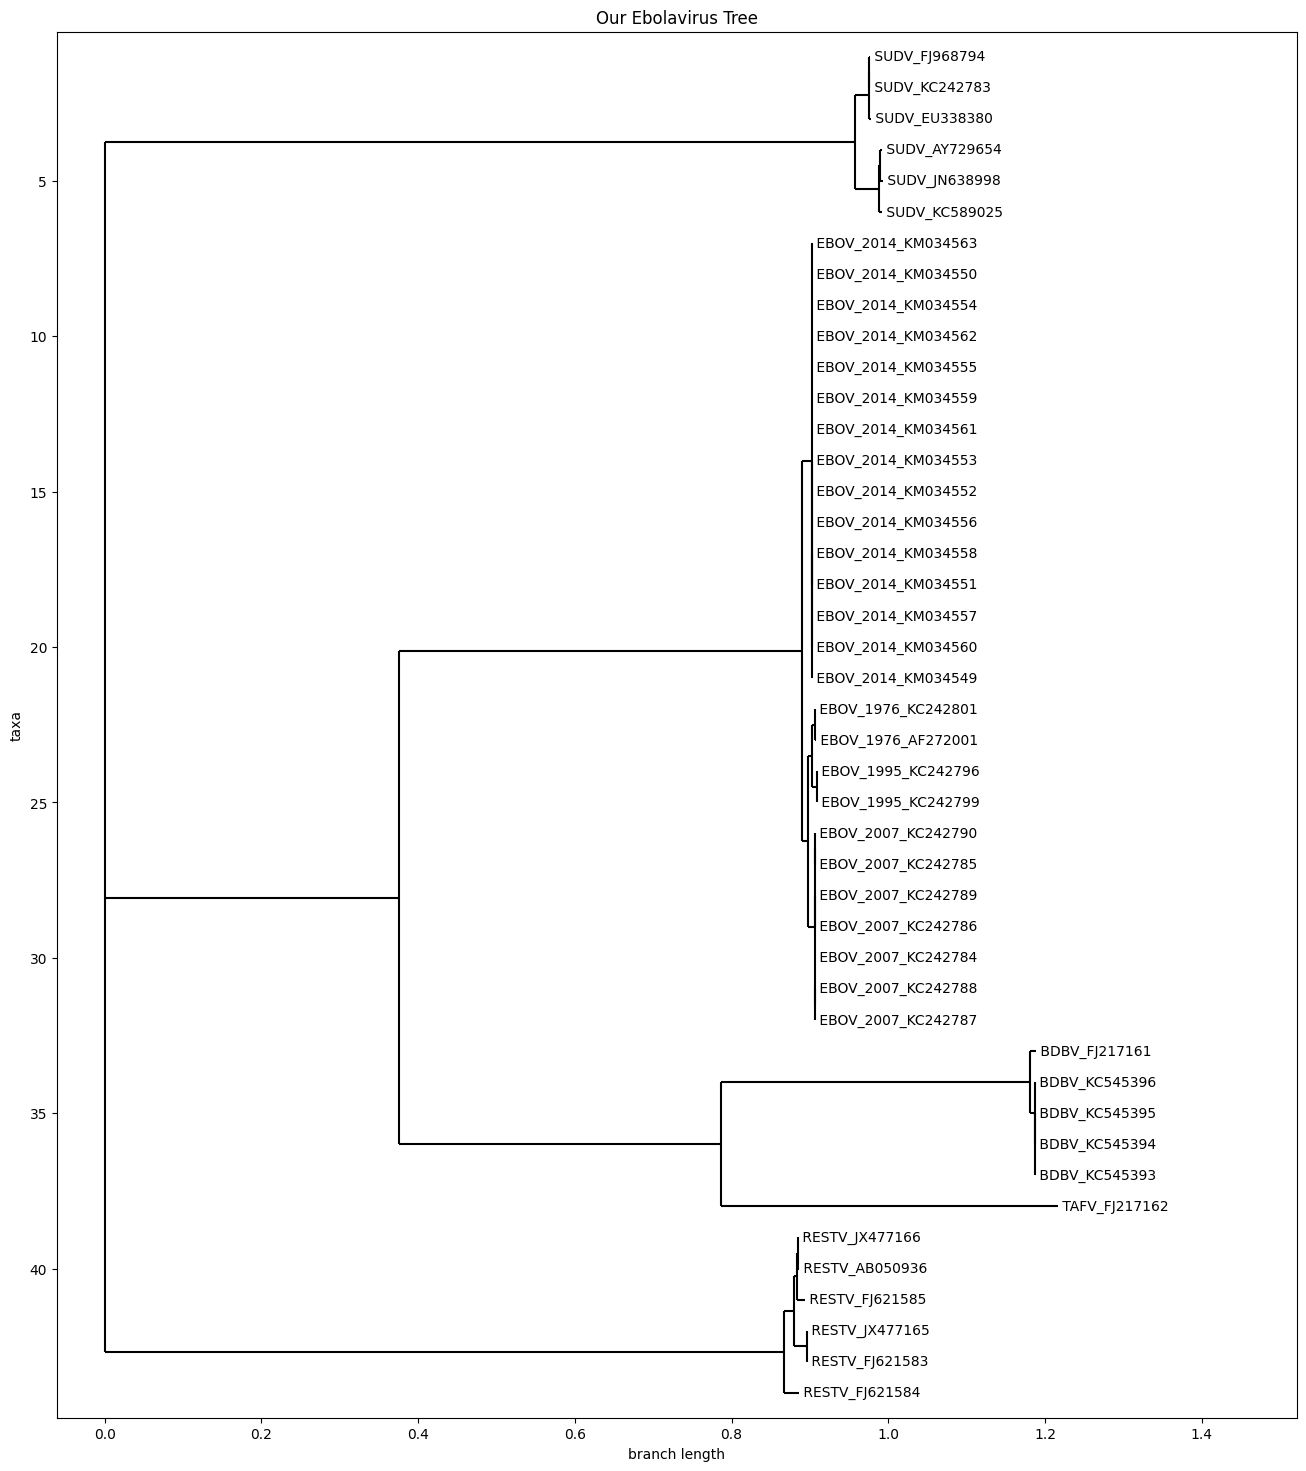

In [9]:
# 20.  Visualize the genus tree
import matplotlib.pyplot as plt
from Bio import Phylo

# Define the correct output tree file from RAxML-NG
tree_file = "ebola_tree.raxml.bestTreeCollapsed"  # Based on the raxml-ng output from the previous step

# Read the tree in Newick format (RAxML-NG default)
my_ebola_tree = Phylo.read(tree_file, "newick")

# Set a name for the tree
my_ebola_tree.name = "Our Ebolavirus Tree"

# Plot the tree
fig = plt.figure(figsize=(16, 18))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(my_ebola_tree, axes=ax)

plt.show()  # Display the tree

In [ ]:
# 21 onward Skipped

In [ ]:
## End of Notebook ##